# Practice notebook for regression analysis with NHANES

This notebook will give you the opportunity to perform some
regression analyses with the NHANES data that are similar to
the analyses done in the week 2 case study notebook.

You can enter your code into the cells that say "enter your code here",
and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar
to code that appears in the case study notebook.  You will need
to edit code from that notebook in small ways to adapt it to the
prompts below.

To get started, we will use the same module imports and
read the data in the same way as we did in the case study:

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

url = "https://raw.githubusercontent.com/kshedden/statswpy/master/NHANES/merged/nhanes_2015_2016.csv"
da = pd.read_csv(url)

# Drop unused columns, drop rows with any missing values.
vars = ["BPXSY1", "RIDAGEYR", "RIAGENDR", "RIDRETH1", "DMDEDUC2", "BMXBMI", "SMQ020"]
da = da[vars].dropna()

## Question 1:

Use linear regression to relate the expected body mass index (BMI) to a person's age.

In [57]:
model = sm.OLS.from_formula("BMXBMI ~ RIDAGEYR", data=da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BMXBMI   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.720
Date:                Sat, 07 Jan 2023   Prob (F-statistic):             0.0991
Time:                        15:48:00   Log-Likelihood:                -17149.
No. Observations:                5102   AIC:                         3.430e+04
Df Residuals:                    5100   BIC:                         3.432e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.0564      0.290    100.143      0.000      28.488      29.625
RIDAGEYR       0.0091      0.006      1.649      0.099      -0.002       0.020
==============================================================================
Omnibus:                      936.202   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1857.656
Skew:                           1.105   Prob(JB):                         0.00
Kurtosis:                       4.964   Cond. No.                         156.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Q1a.__ According to your fitted model, do older people tend to have higher or lower BMI than younger people?

yes

__Q1b.__ Based your analysis, are you confident that there is a relationship between BMI and age in the population that NHANES represents?

no

__Q1c.__ By how much does the average BMI of a 40 year old differ from the average BMI of a 20 year old?

In [58]:
(40 - 20)*0.0091

0.182

__Q1d.__ What fraction of the variation of BMI in this population is explained by age?

In [59]:
cc = da[['BMXBMI','RIDAGEYR']].corr()
print(cc)
cc.BMXBMI.RIDAGEYR**2

            BMXBMI  RIDAGEYR
BMXBMI    1.000000  0.023089
RIDAGEYR  0.023089  1.000000


0.0005331238438369014

## Question 2: 

Add gender and ethnicity as additional control variables to your linear model relating BMI to age.  You will need to recode the ethnic groups based
on the values in the codebook entry for [RIDRETH1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDRETH1).

In [60]:
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})
da['RIDRETH1x'] = da.RIDRETH1.replace({1: 'Mexican American', 2: 'Other Hispanic', 3: 'Non-Hispanic White', \
                                         4: 'Non-Hispanic Black', 5: 'Other Race'})
model = sm.OLS.from_formula("BMXBMI ~ RIDAGEYR + RIAGENDRx + RIDRETH1x", data=da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BMXBMI   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     49.27
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           3.98e-59
Time:                        15:48:02   Log-Likelihood:                -17007.
No. Observations:                5102   AIC:                         3.403e+04
Df Residuals:                    5095   BIC:                         3.407e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          31.2361      0.355     87.891      0.000      30.539      31.933
RIAGENDRx[T.Male]                  -1.0226      0.190     -5.370      0.000      -1.396      -0.649
RIDRETH1x[T.Non-Hispanic Black]    -0.4499      0.308     -1.460      0.144      -1.054       0.154
RIDRETH1x[T.Non-Hispanic White]    -1.8555      0.282     -6.588      0.000      -2.408      -1.303
RIDRETH1x[T.Other Hispanic]        -0.9379      0.345     -2.721      0.007      -1.614      -0.262
RIDRETH1x[T.Other Race]            -4.7799      0.334    -14.318      0.000      -5.434      -4.125
RIDAGEYR                            0.0065      0.005      1.196      0.232      -0.004       0.017
==============================================================================
Omnibus:                      917.090   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1855.286
Skew:                           1.075   Prob(JB):                         0.00
Kurtosis:                       5.026   Cond. No.                         308.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Q2a.__ How did the mean relationship between BMI and age change when you added additional covariates to the model?

Decreased from 0.0091 to 0.0065

__Q2b.__ How did the standard error for the regression parameter for age change when you added additional covariates to the model?

Decreased from 0.006 to 0.005

__Q2c.__ How much additional variation in BMI is explained by age, gender, and ethnicity that is not explained by age alone?

0.055-0.001 = 0.054 R squared

__Q2d.__ What reference level did the software select for the ethnicity variable?

Mexican American

__Q2e.__ What is the expected difference between the BMI of a 40 year-old non-Hispanic black man and a 30 year-old non-Hispanic black man?

(40-30) *0.0065 = 0.065

__Q2f.__ What is the expected difference between the BMI of a 50 year-old Mexican American woman and a 50 year-old non-Hispanic black man?

baseline = 50 year old mexican american woman
changes = -1.0226 -0.4499 = - 1.4725

## Question 3: 

Randomly sample 25% of the NHANES data, then fit the same model you used in question 2 to this data set.

In [61]:
print(da.info())
da1 = da.sample(1276)
len(da1)
model = sm.OLS.from_formula("BMXBMI ~ RIDAGEYR + RIAGENDRx + RIDRETH1x", data=da1)
result = model.fit()
result.summary()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5102 entries, 0 to 5734
Data columns (total 9 columns):
BPXSY1       5102 non-null float64
RIDAGEYR     5102 non-null int64
RIAGENDR     5102 non-null int64
RIDRETH1     5102 non-null int64
DMDEDUC2     5102 non-null float64
BMXBMI       5102 non-null float64
SMQ020       5102 non-null int64
RIAGENDRx    5102 non-null object
RIDRETH1x    5102 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 398.6+ KB
None


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BMXBMI   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     10.88
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           7.75e-12
Time:                        15:48:04   Log-Likelihood:                -4275.1
No. Observations:                1276   AIC:                             8564.
Df Residuals:                    1269   BIC:                             8600.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          30.4715      0.716     42.561      0.000      29.067      31.876
RIAGENDRx[T.Male]                  -1.1549      0.389     -2.966      0.003      -1.919      -0.391
RIDRETH1x[T.Non-Hispanic Black]    -0.5698      0.615     -0.926      0.355      -1.777       0.638
RIDRETH1x[T.Non-Hispanic White]    -1.4385      0.566     -2.540      0.011      -2.549      -0.328
RIDRETH1x[T.Other Hispanic]        -1.1713      0.681     -1.720      0.086      -2.507       0.165
RIDRETH1x[T.Other Race]            -4.4491      0.681     -6.534      0.000      -5.785      -3.113
RIDAGEYR                            0.0230      0.011      2.059      0.040       0.001       0.045
==============================================================================
Omnibus:                      255.137   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              547.840
Skew:                           1.127   Prob(JB):                    1.09e-119
Kurtosis:                       5.285   Cond. No.                         298.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Q3a.__ How do the estimated regression coefficients and their standard errors compare between these two models?  Do you see any systematic relationship between the two sets of results?

Coefficients is x2, standard error is x 2.4. smaller sampel leads to higher coefficient and higher standard error

## Question 4:

Generate a scatterplot of the residuals against the fitted values for the model you fit in question 2.

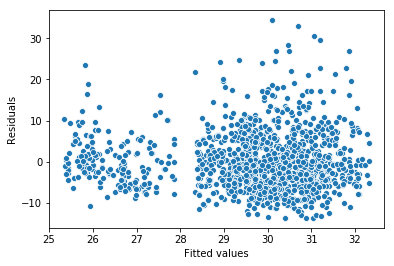

In [62]:
pp = sns.scatterplot(result.fittedvalues, result.resid)
pp.set_xlabel("Fitted values")
_ = pp.set_ylabel("Residuals")

__Q4a.__ What mean/variance relationship do you see?

Variance increase with mean increase upto BMI 30-31, then minor decease towards BMI 32

## Question 5: 

Generate a plot showing the fitted mean BMI as a function of age for Mexican American men.  Include a 95% simultaneous confidence band on your graph.

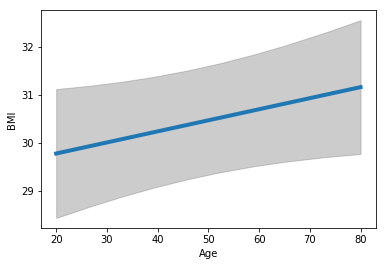

In [63]:
from statsmodels.sandbox.predict_functional import predict_functional
values = {"RIAGENDRx": "Male", "RIAGENDR": 1,'BPXSY1':1,"RIDRETH1x": "Mexican American",
          "DMDEDUC2": 1, "RIDRETH1": 1, "SMQ020": 1}
pr, cb, fv = predict_functional(result, "RIDAGEYR",
                values=values, ci_method="simultaneous")
ax = sns.lineplot(fv, pr, lw=4)
ax.fill_between(fv, cb[:, 0], cb[:, 1], color='grey', alpha=0.4)
ax.set_xlabel("Age")
_ = ax.set_ylabel("BMI")

__Q5a.__ According to your graph, what is the longest interval starting at year 30 following which the mean BMI could be constant?  *Hint:* What is the longest horizontal line starting at age 30 that remains within the confidence band? 

BMI around 29.5-31.5

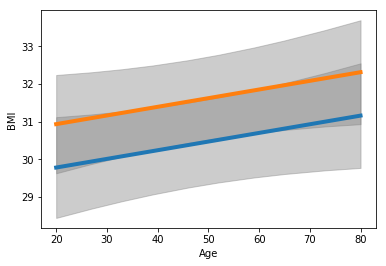

In [64]:
values = {"RIAGENDRx": "Male", "RIAGENDR": 1,'BPXSY1':1,"RIDRETH1x": "Mexican American",
          "DMDEDUC2": 1, "RIDRETH1": 1, "SMQ020": 1}
pr, cb, fv = predict_functional(result, "RIDAGEYR",
                values=values, ci_method="simultaneous")
ax = sns.lineplot(fv, pr, lw=4)
ax.fill_between(fv, cb[:, 0], cb[:, 1], color='grey', alpha=0.4)
ax.set_xlabel("Age")
_ = ax.set_ylabel("BMI")

values = {"RIAGENDRx": "Female", "RIAGENDR": 1,'BPXSY1':1,"RIDRETH1x": "Mexican American",
          "DMDEDUC2": 1, "RIDRETH1": 1, "SMQ020": 1}
pr, cb, fv = predict_functional(result, "RIDAGEYR",
                values=values, ci_method="simultaneous")
ax = sns.lineplot(fv, pr, lw=4)
ax.fill_between(fv, cb[:, 0], cb[:, 1], color='grey', alpha=0.4)
ax.set_xlabel("Age")
_ = ax.set_ylabel("BMI")

__Q5b.__ Add an additional line and confidence band to the same plot, showing the relationship between age and BMI for Mexican American women.  At what ages do these intervals not overlap?

Overlap on all ages

## Question 6:

Use an added variable plot to assess the linearity of the relationship between BMI and age (when controlling for gender and ethnicity).

49.45511564092513

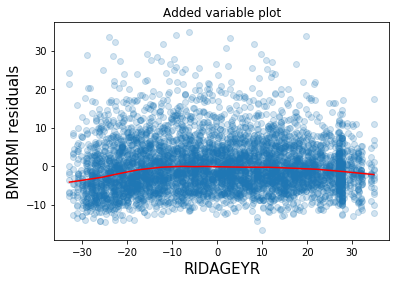

In [65]:
from statsmodels.graphics.regressionplots import add_lowess

model = sm.GLM.from_formula("BMXBMI ~ RIDAGEYR + RIAGENDRx + RIDRETH1x", data=da)
result = model.fit()
result.summary()

fig = result.plot_added_variable("RIDAGEYR")
ax = fig.get_axes()[0]
ax.lines[0].set_alpha(0.2)
_ = add_lowess(ax)

da["RIDAGEYR"].mean()

__Q6a.__ What is your interpretation of the added variable plot?

the line increase faster from 18-39 indicating that BMI increase slightly faster
the line stays rather flat from 49 onwards.

## Question 7: 

Generate a binary variable reflecting whether a person has had at least 12 drinks in their lifetime, based on the [ALQ110](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/ALQ_I.htm#ALQ110) variable in NHANES.  Calculate the marginal probability, odds, and log odds of this variable for women and for men.  Then calculate the odds ratio for females relative to males.

In [66]:
da.columns

Index(['BPXSY1', 'RIDAGEYR', 'RIAGENDR', 'RIDRETH1', 'DMDEDUC2', 'BMXBMI',
       'SMQ020', 'RIAGENDRx', 'RIDRETH1x'],
      dtype='object')

In [67]:
url = "https://raw.githubusercontent.com/kshedden/statswpy/master/NHANES/merged/nhanes_2015_2016.csv"
da = pd.read_csv(url)

vars = ["RIDAGEYR", "RIAGENDR", "RIDRETH1", "DMDEDUC2", "ALQ110"]
da = da[vars].dropna()

In [73]:
da["ALQ110x"] = da.ALQ110.replace({1:1, 2: 0, 7: np.nan, 9: np.nan}) 
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})
c = pd.crosstab(da.RIAGENDRx, da.ALQ110x).apply(lambda x: x/x.sum(), axis=1)
c["odds"] = c.loc[:,1]/c.loc[:,0]
c["logodds"] = np.log(c.odds)
c

ALQ110x,0.0,1.0,odds,logodds
RIAGENDRx,,,,
Female,0.550492,0.449508,0.816558,-0.202657
Male,0.541667,0.458333,0.846154,-0.167054


__Q7a.__ Based on the log odds alone, do more than 50% of women drink alcohol?

nope

__Q7b.__ Does there appear to be an important difference between the alcohol use rate of women and men?

In [74]:
c.odds.Male/c.odds.Female

1.036244074017434

## Question 8: 

Use logistic regression to express the log odds that a person drinks (based on the binary drinking variable that you constructed above) in terms of gender.

In [75]:
model = sm.GLM.from_formula("ALQ110x ~ RIAGENDRx", family=sm.families.Binomial(), data=da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                ALQ110x   No. Observations:                 1575
Model:                            GLM   Df Residuals:                     1573
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1084.4
Date:                Sat, 07 Jan 2023   Deviance:                       2168.8
Time:                        15:55:11   Pearson chi2:                 1.58e+03
No. Iterations:                     4   Covariance Type:             nonrobust
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.2027      0.060     -3.372      0.001      -0.320      -0.085
RIAGENDRx[T.Male]     0.0356      0.112      0.319      0.750      -0.183       0.254
=====================================================================================
"""

__Q8a.__ Is there statistical evidence that the drinking rate differs between women and men?  If so, in what direction is there a difference?

__Q8b.__ Confirm that the log odds ratio between drinking and smoking calculated using the logistic regression model matches the log odds ratio calculated directly in question 6.

In [76]:
c.logodds.Male - c.logodds.Female

0.035602708770614305

## Question 9: 

Use logistic regression to relate drinking to age, gender, and education.

In [77]:
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "lt9", 2: "x9_11", 3: "HS", 4: "SomeCollege",
                                       5: "College", 7: np.nan, 9: np.nan})
model = sm.GLM.from_formula("ALQ110x ~ RIDAGEYR + RIAGENDRx + DMDEDUC2x", family=sm.families.Binomial(), data=da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                ALQ110x   No. Observations:                 1574
Model:                            GLM   Df Residuals:                     1567
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1059.5
Date:                Sat, 07 Jan 2023   Deviance:                       2118.9
Time:                        15:59:01   Pearson chi2:                 1.57e+03
No. Iterations:                     4   Covariance Type:             nonrobust
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.4296      0.185     -2.316      0.021      -0.793      -0.066
RIAGENDRx[T.Male]            0.0172      0.114      0.151      0.880      -0.205       0.240
DMDEDUC2x[T.HS]             -0.0873      0.157     -0.556      0.578      -0.395       0.221
DMDEDUC2x[T.SomeCollege]     0.0536      0.146      0.367      0.713      -0.232       0.339
DMDEDUC2x[T.lt9]            -0.8972      0.171     -5.253      0.000      -1.232      -0.562
DMDEDUC2x[T.x9_11]          -0.4886      0.182     -2.681      0.007      -0.846      -0.131
RIDAGEYR                     0.0086      0.003      2.951      0.003       0.003       0.014
============================================================================================
"""

__Q9a.__ Which of these predictor variables shows a statistically significant association with drinking?

Age. Edu (it9,tx9_11)

__Q9b.__ What is the odds of a college educated, 50 year old woman drinking?

In [79]:
np.exp(50*0.0086-0.4296)

1.0004000800106678

__Q9c.__ What is the odds ratio between the drinking status for college graduates and high school graduates (with no college), holding gender and age fixed?

In [80]:
np.exp(0-0.0873) # odd(A/B) = exp(logoddA - logoddB)

0.9164021337508069

__Q9d.__ Did the regression parameter for gender change to a meaningful degree when age and education were added to the model?

Yes. eg. coef decreased from 0.0365 to 0.0086

## Question 10:

Construct a CERES plot for the relationship between drinking and age (using the model that controls for gender and educational attainment).

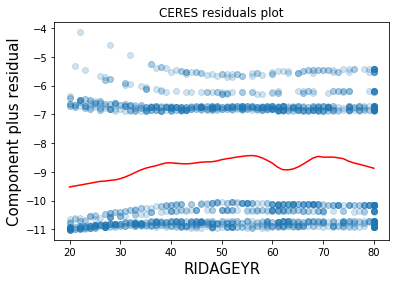

In [81]:
fig = result.plot_ceres_residuals("RIDAGEYR")
ax = fig.get_axes()[0]
ax.lines[0].set_alpha(0.2)
_ = add_lowess(ax)

__Q10a.__ Does the plot indicate any major non-linearity in the relationship between age and the log odds for drinking?

yes